In [118]:
import pandas as pd

In [100]:
df = pd.read_csv("banco_predicao_pensamento_computacional.csv", na_values="#NULL!", decimal=',')

In [101]:
df = df.drop(columns=["id", "cor_pele"])

In [102]:
df.isna().sum()

idade                        0
genero                      16
escolaridade                 0
renda_familiar             342
renda_sabe                  23
pessoas_casa                11
con_1                       21
con_2                       21
con_3                       21
con_4                       21
con_5                       21
con_6                       21
linguagem_programacao       27
horas_eletronicos_dia       91
conhecimento_info_total     34
scr_itens_casa              19
suporte_escolar_total      329
autocons                    96
autogest_mot                65
cons_soc                   128
tom_dec                    101
mindset_sum                 53
tpcr_total                 293
dtype: int64

In [119]:
df.tpcr_total.describe()

count    618.000000
mean       8.236246
std        2.999597
min        2.000000
25%        7.000000
50%        7.000000
75%        9.000000
max       19.000000
Name: tpcr_total, dtype: float64

In [103]:
# from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
# imputer = KNNImputer(n_neighbors=2, weights="uniform")

In [104]:
for column in df.columns:
    df[column] = imp.fit_transform(df[column].values.reshape(-1, 1))

In [105]:
df

,idade,genero,escolaridade,renda_familiar,renda_sabe,pessoas_casa,con_1,con_2,con_3,con_4,...,horas_eletronicos_dia,conhecimento_info_total,scr_itens_casa,suporte_escolar_total,autocons,autogest_mot,cons_soc,tom_dec,mindset_sum,tpcr_total
0,13.0,1.0,2,2.0,0.0,2.0,1.0,0.0,0.0,1.0,...,10.0,3.0,9.0,3.33,4.00,4.33,2.83,3.33,4.00,6.0
1,11.0,1.0,1,2.0,0.0,1.0,0.0,1.0,0.0,1.0,...,10.0,4.0,4.0,3.33,4.00,4.33,4.00,3.00,4.75,11.0
2,11.0,1.0,1,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,10.0,1.0,5.0,3.33,4.00,3.67,3.50,3.33,4.00,4.0
3,14.0,1.0,4,2.0,0.0,3.0,0.0,0.0,1.0,1.0,...,6.0,3.0,16.0,3.33,3.75,3.67,3.33,4.00,5.00,16.0
4,11.0,1.0,1,2.0,0.0,4.0,1.0,0.0,0.0,1.0,...,1.0,3.0,17.0,3.33,4.75,4.33,4.33,3.67,5.00,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,14.0,1.0,4,2.0,0.0,2.0,1.0,0.0,0.0,1.0,...,6.0,3.0,9.0,3.33,3.50,3.00,4.00,3.67,6.00,7.0
614,14.0,1.0,4,2.0,0.0,3.0,0.0,0.0,1.0,1.0,...,12.0,4.0,15.0,3.33,4.50,4.67,4.33,4.00,5.50,3.0
615,13.0,1.0,2,2.0,0.0,3.0,0.0,0.0,0.0,1.0,...,4.0,3.0,8.0,3.33,4.00,4.33,4.00,4.00,6.00,7.0
616,13.0,1.0,3,2.0,0.0,3.0,0.0,0.0,0.0,1.0,...,4.0,3.0,8.0,3.33,4.00,4.00,3.67,3.33,5.75,7.0


In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["tpcr_total"])
y = df.tpcr_total

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [108]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [109]:
regr.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)

In [110]:
y_pred = regr.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)


2.164012346580629

In [111]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred)

0.29320796955813644

In [112]:
print(y_test[:10], y_pred[:10])

49      7.0
582     7.0
82      7.0
305     7.0
109     7.0
606     7.0
268    10.0
353    11.0
328     7.0
533     6.0
Name: tpcr_total, dtype: float64 [8.14890275 7.69759528 7.67966242 8.57066227 9.78649411 7.53439255
 8.85542489 8.51124241 7.76470936 8.26344734]


In [113]:
importances = regr.feature_importances_

In [114]:
import numpy as np

std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)

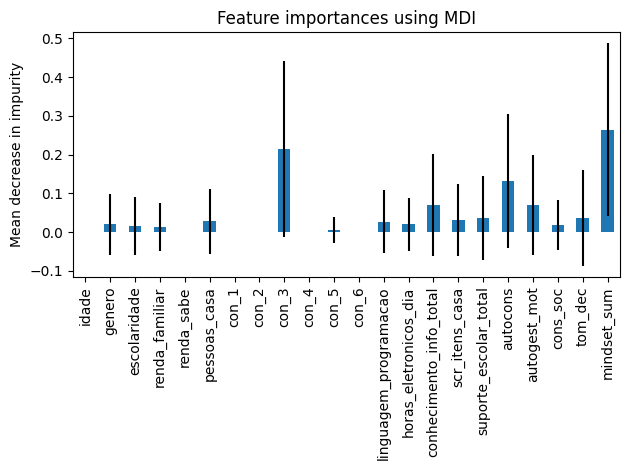

In [115]:
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [116]:
from sklearn.inspection import permutation_importance

# start_time = time.time()
result = permutation_importance(
    regr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
# elapsed_time = time.time() - start_time
# print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X.columns)

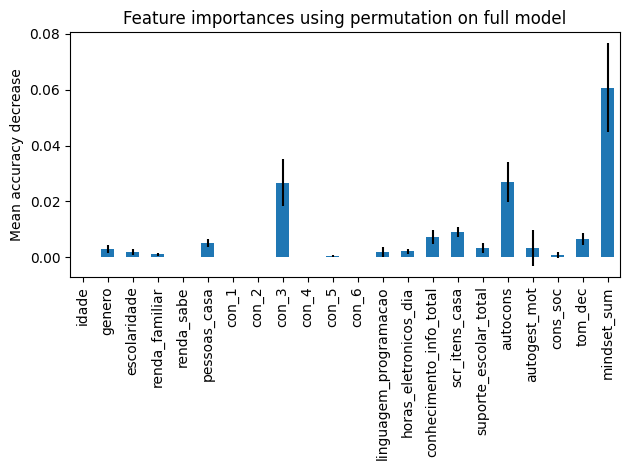

In [117]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()